# 10. Time Series 

### Date and Time Data Types and Tools

In [1]:
from datetime import datetime

In [2]:
now = datetime.now()

In [3]:
now

datetime.datetime(2017, 3, 11, 15, 17, 36, 691488)

In [4]:
now.year, now.month, now.day

(2017, 3, 11)

In [5]:
delta = datetime(2011,11,7) - datetime(2008,6,24,8,15)

In [6]:
delta

datetime.timedelta(1230, 56700)

In [7]:
delta.days

1230

In [8]:
delta.seconds

56700

In [9]:
from datetime import timedelta

In [11]:
start = datetime(2011,1,7)
start

datetime.datetime(2011, 1, 7, 0, 0)

In [12]:
start + timedelta(12) # 12일 추가 

datetime.datetime(2011, 1, 19, 0, 0)

In [14]:
start - 2 * timedelta(12) # 24일 빼기. 

datetime.datetime(2010, 12, 14, 0, 0)

#### Types in datetime module 
 - date : Store calendar date (year, month, day) using the Gregorian calendar.
 - time : Store time of day as hours, minutes, seconds, and microseconds
 - datetime : Stores both date and time
 - timedelta : Represents the difference between two datetime values (as days, seconds, and microseconds)

### Converting between string and datetime

In [15]:
stamp = datetime(2011,1,3)
stamp

datetime.datetime(2011, 1, 3, 0, 0)

In [16]:
str(stamp)

'2011-01-03 00:00:00'

In [17]:
stamp.strftime('%Y-%m-%d')

'2011-01-03'

 Converting strings to dastes using **datetime.strptime**
  - datetime.strptime is the best way to parse a date with a known format.

In [18]:
value = '2011-01-03'

In [19]:
datetime.strptime(value,"%Y-%m-%d")

datetime.datetime(2011, 1, 3, 0, 0)

In [20]:
datestrs = ['7/6/2011','8/6/2011']
datestrs

['7/6/2011', '8/6/2011']

In [21]:
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

- especially for common date formats. In this case, you can use the parser.parse method in the third party dateutil package

In [22]:
from dateutil.parser import parse

In [23]:
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

 - dateutil is capable of parsing almost any human-intelligible date representation

In [24]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

 - In international locales, day appearing before month is very common, so you can pass dayfirst=True to indicate this

In [26]:
parse('6/11/2013', dayfirst=True)

datetime.datetime(2013, 11, 6, 0, 0)

 - **Pandas** is generally oriented toward working with arrays of dates. whether used as an axis index or a column in a DataFrame.

In [27]:
import pandas as pd

In [28]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

In [29]:
idx = pd.to_datetime(datestrs + [None])

In [30]:
idx

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [31]:
pd.isnull(idx)

array([False, False,  True], dtype=bool)

|Type | Description |   
|---|---|
|%Y |4-digit year|
|%y |2-digit year|
|%m |2-digit month [01, 12]|
|%d |2-digit day [01, 31]|
|%H |Hour (24-hour clock) [00, 23]|
|%I |Hour (12-hour clock) [01, 12]|
|%M |2-digit minute [00, 59]|
|%S |Second [00, 61] (seconds 60, 61 account for leap seconds)|
|%w |Weekday as integer [0 (Sunday), 6]|
|%U |Week number of the year [00, 53]. Sunday is considered the first day of the week, and days before the first Sunday of the year are “week 0”.|
|%W |Week number of the year [00, 53]. Monday is considered the first day of the week, and days before the first Monday of the year are “week 0”.|
|%z |UTC time zone offset as +HHMM or -HHMM, empty if time zone naive|
|%F |Shortcut for %Y-%m-%d, for example 2012-4-18|
|%D |Shortcut for %m/%d/%y, for example 04/18/12|

## Time Series Basics
 - The most basic kind of time series object in pandas is a Series indexed by timestamps, which is often represented external to pandas as Python strings or datetime objects

In [37]:
from datetime import datetime
from pandas import Series
import numpy as np

In [41]:
%matplotlib inline

In [33]:
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
 datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 12)]

In [34]:
dates

[datetime.datetime(2011, 1, 2, 0, 0),
 datetime.datetime(2011, 1, 5, 0, 0),
 datetime.datetime(2011, 1, 7, 0, 0),
 datetime.datetime(2011, 1, 8, 0, 0),
 datetime.datetime(2011, 1, 10, 0, 0),
 datetime.datetime(2011, 1, 12, 0, 0)]

In [38]:
ts = Series(np.random.randn(6), index= dates)

In [39]:
ts

2011-01-02    0.780879
2011-01-05   -0.339939
2011-01-07   -1.156552
2011-01-08   -0.908555
2011-01-10    0.023279
2011-01-12    1.553274
dtype: float64

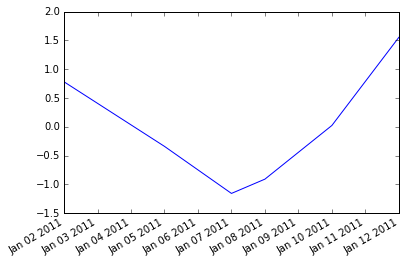

In [42]:
ts.plot()

In [43]:
type(ts)

pandas.core.series.Series

In [44]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [46]:
ts[::2] # 2개씩 뛰어넘어서 0, 2, 4 이렇게 

2011-01-02    0.780879
2011-01-07   -1.156552
2011-01-10    0.023279
dtype: float64

In [47]:
ts + ts[::2]

2011-01-02    1.561758
2011-01-05         NaN
2011-01-07   -2.313103
2011-01-08         NaN
2011-01-10    0.046557
2011-01-12         NaN
dtype: float64

In [48]:
ts.index.dtype

dtype('<M8[ns]')

In [49]:
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

### Indexing, Selection, Subsetting

In [50]:
stamp = ts.index[2]
stamp

Timestamp('2011-01-07 00:00:00')

In [51]:
ts[stamp]

-1.1565515957902237

In [52]:
ts['1/10/2011']

0.023278589894001108

In [53]:
ts['2011/1/10']

0.023278589894001108

In [54]:
longer_ts = Series(np.random.randn(1000),index=pd.date_range('1/1/2000', periods=1000))
longer_ts[:10]

2000-01-01    1.166838
2000-01-02   -0.138576
2000-01-03   -0.589441
2000-01-04    1.770148
2000-01-05   -0.351048
2000-01-06    0.093534
2000-01-07    0.422227
2000-01-08   -0.776067
2000-01-09    0.153887
2000-01-10   -1.191307
Freq: D, dtype: float64

In [58]:
longer_ts.dtype

dtype('float64')

 - Slicing with dates works just like with a regular Series

In [59]:
longer_ts['2001'][:10] 

2001-01-01   -2.308057
2001-01-02    0.854589
2001-01-03    1.133737
2001-01-04    0.513216
2001-01-05    0.327455
2001-01-06   -0.268536
2001-01-07    1.573545
2001-01-08    0.788352
2001-01-09   -1.475040
2001-01-10    1.136754
Freq: D, dtype: float64

In [60]:
longer_ts['2001-05'][:10]

2001-05-01   -0.524645
2001-05-02    1.632512
2001-05-03    2.330912
2001-05-04    0.052846
2001-05-05   -0.411067
2001-05-06   -0.224172
2001-05-07   -0.214921
2001-05-08   -1.229271
2001-05-09    0.200362
2001-05-10   -0.735131
Freq: D, dtype: float64

In [62]:
ts[datetime(2011,1,7):] # 2011-01-07 이후로 데이터 가지고 오기.

2011-01-07   -1.156552
2011-01-08   -0.908555
2011-01-10    0.023279
2011-01-12    1.553274
dtype: float64

In [64]:
ts

2011-01-02    0.780879
2011-01-05   -0.339939
2011-01-07   -1.156552
2011-01-08   -0.908555
2011-01-10    0.023279
2011-01-12    1.553274
dtype: float64

In [65]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -1.156552
2011-01-08   -0.908555
2011-01-10    0.023279
dtype: float64

 - There is an equivalent instance method truncate which slices a TimeSeries between two dates
 - p. 296

In [66]:
ts.truncate(after='1/9/2011')

2011-01-02    0.780879
2011-01-05   -0.339939
2011-01-07   -1.156552
2011-01-08   -0.908555
dtype: float64